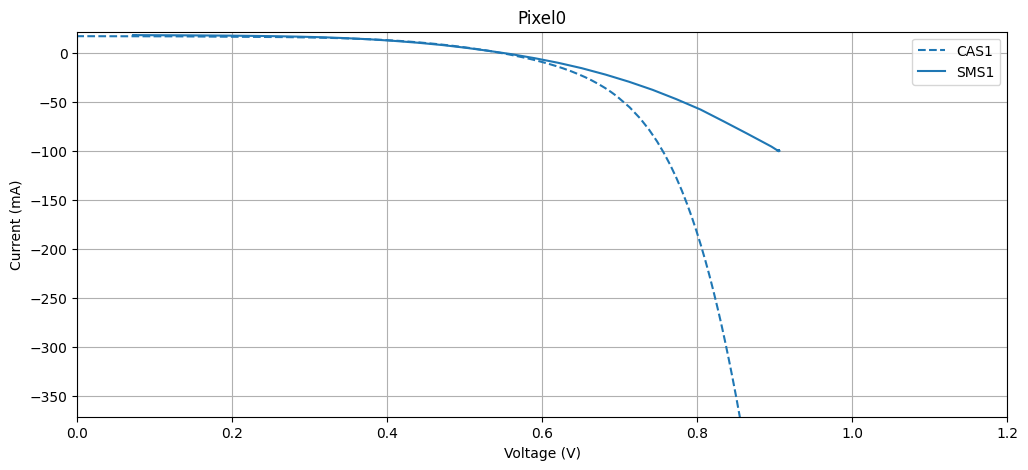

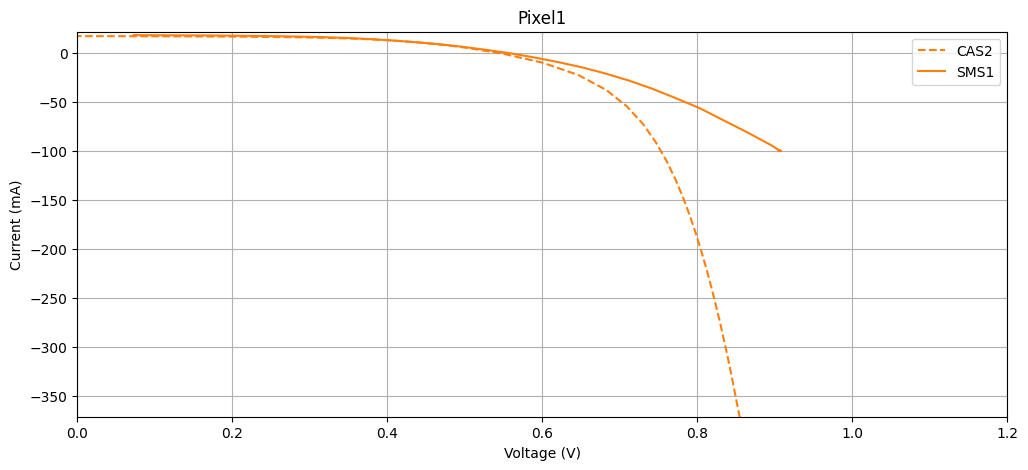

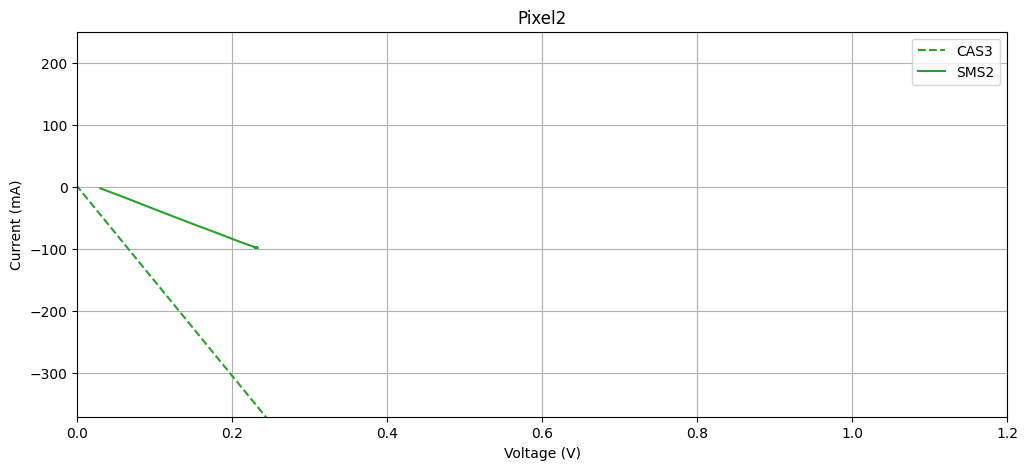

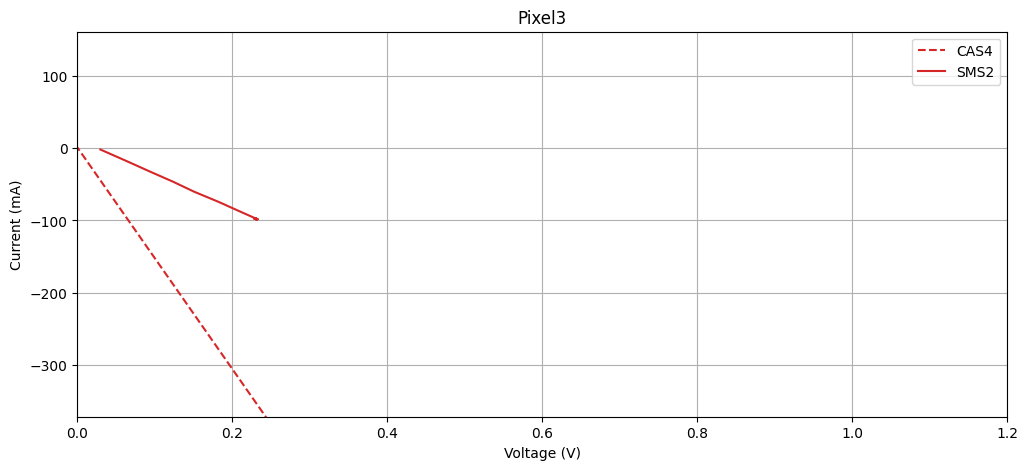

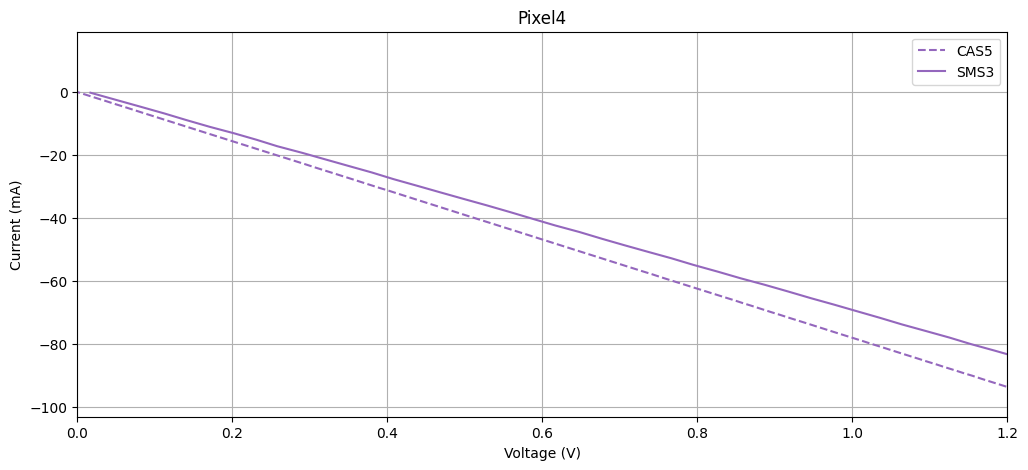

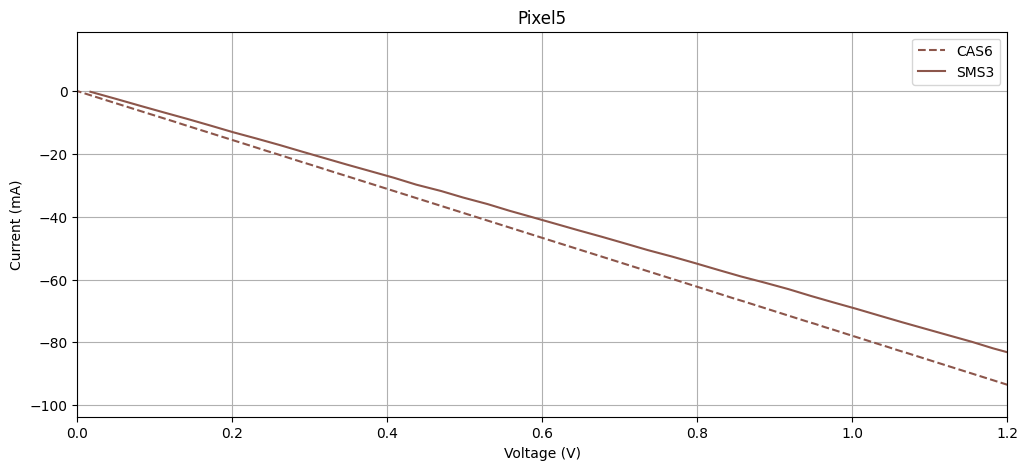

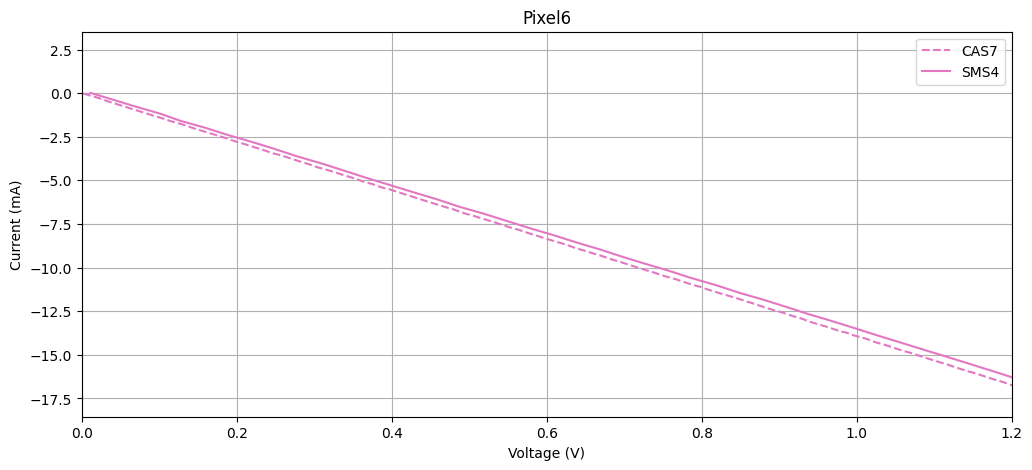

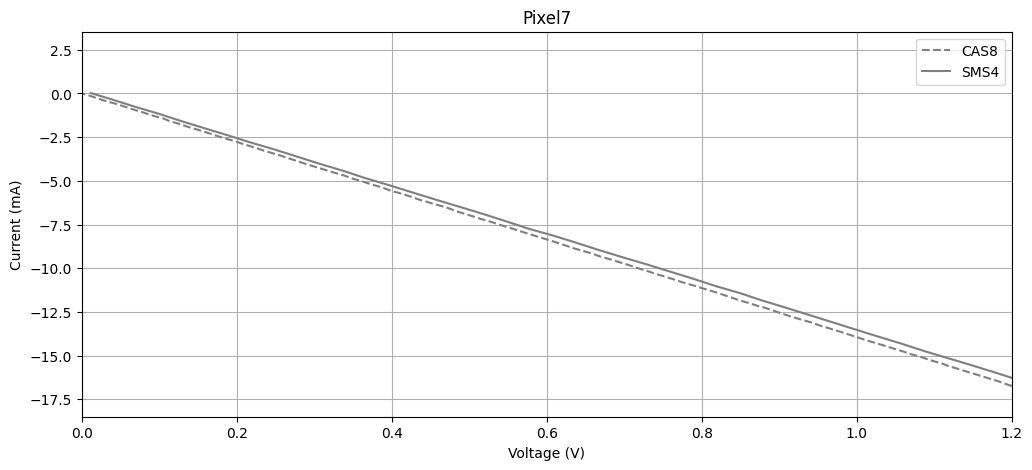

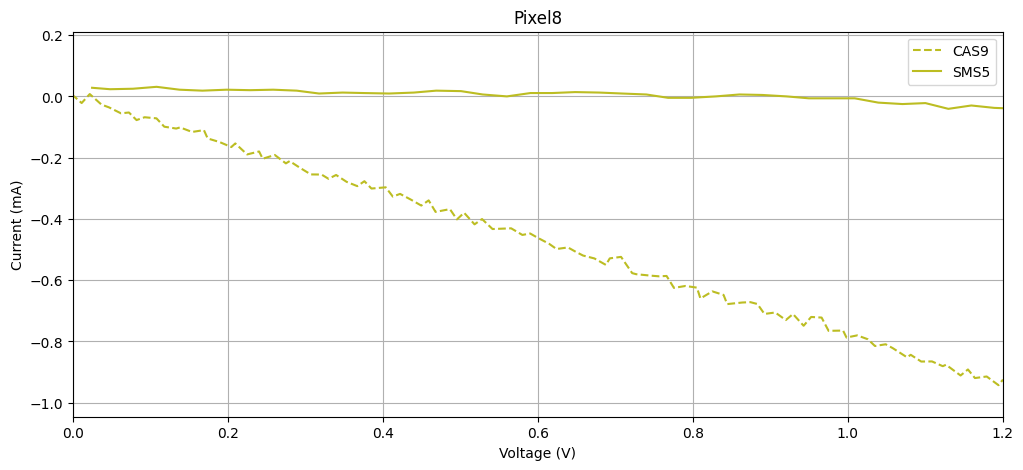

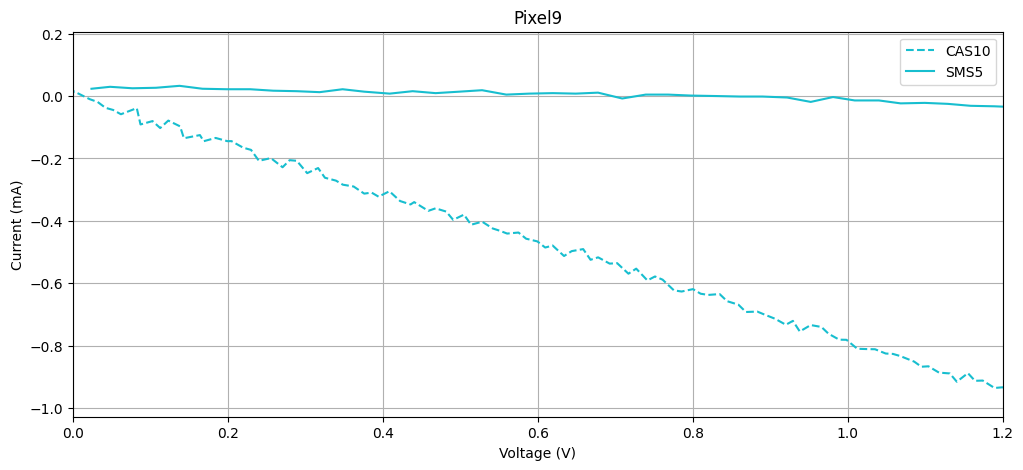

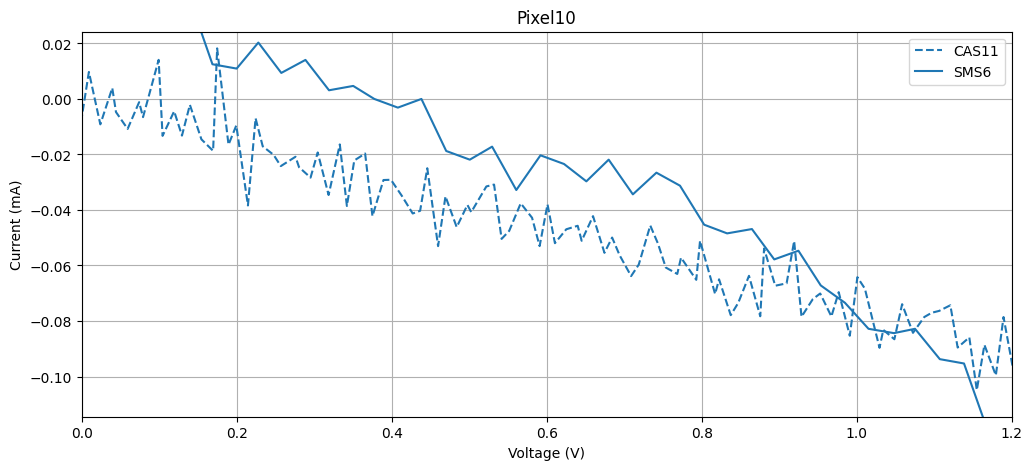

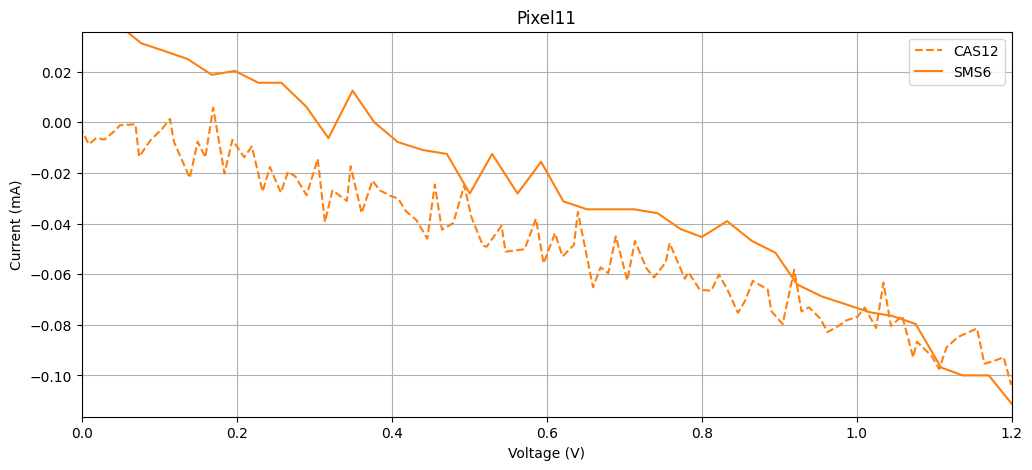

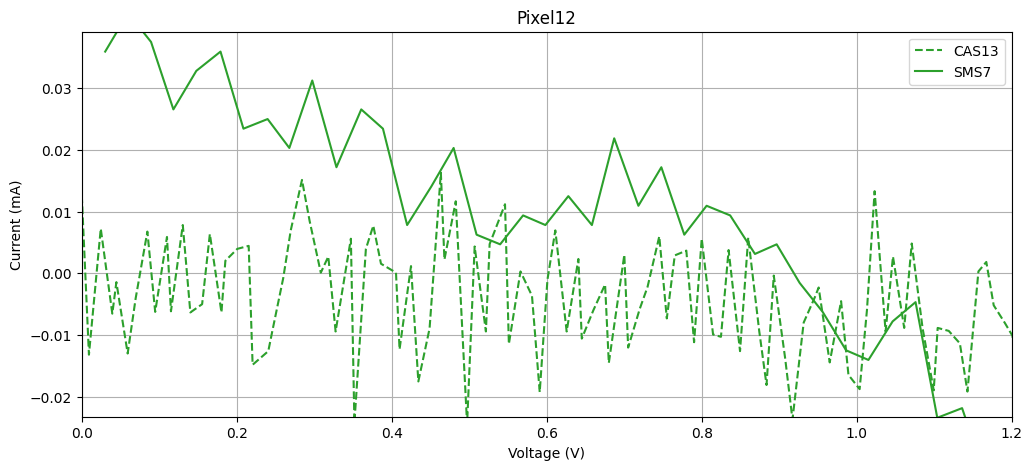

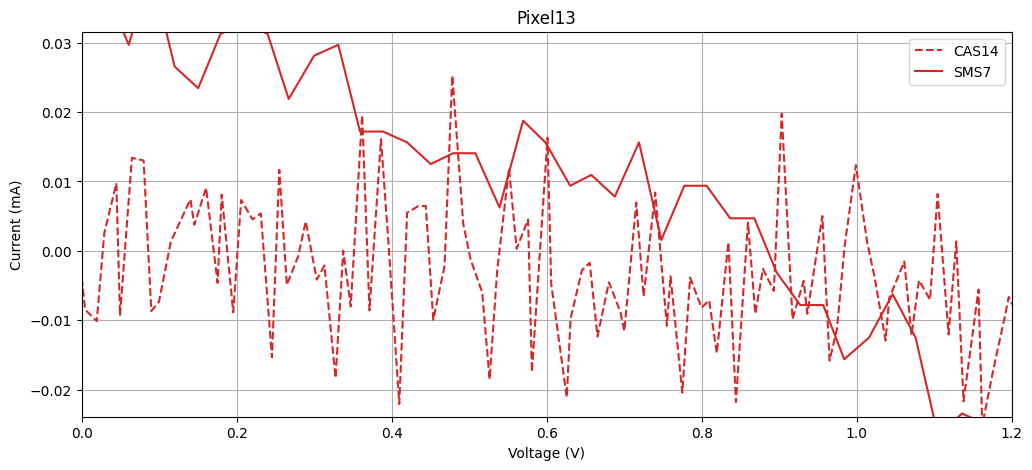

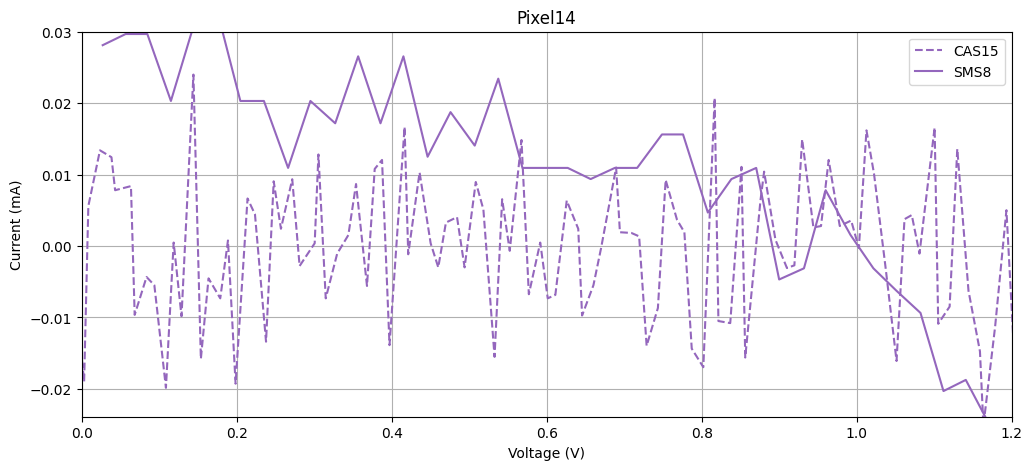

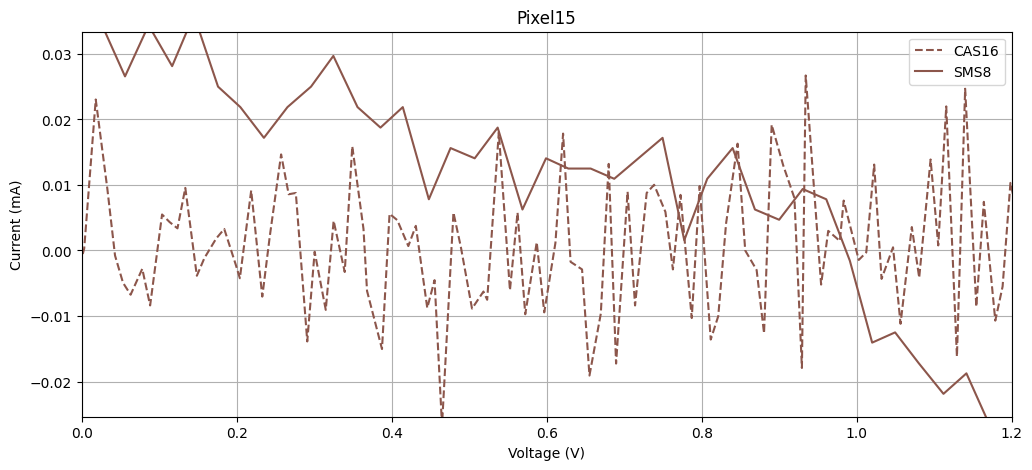

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import numpy_indexed as npi
from labellines import labelLines
import os
import sys


litos_diode = rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\_Old\photodiodetest\Litos_analyzed\100\Data\photo - 100p_1.0Sun_Scan0.txt"
sms_diode = rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-30-2025 16_26_04 Diode Test\Apr-30-2025_16-26-10__ID1__light__scan.csv"
header = np.genfromtxt(
	litos_diode,
	delimiter=',',
	dtype=str,
	max_rows=1,
	encoding='cp1252'
)

litos_data = np.genfromtxt(
					litos_diode,
					delimiter=',',
					comments='#',
					skip_header=1,
					encoding='cp1252'  # Specify the correct encoding
				)

arr = np.loadtxt(sms_diode, delimiter=",", dtype=str)
header_row = np.where(arr == "Time")[0][0]

litos_v = litos_data[:, ::2][:, ::-1].astype(float)
litos_ma = litos_data[:, 1::2][:, ::-1].astype(float)

meta_data = {}
for data in arr[:header_row, :2]:
	meta_data[data[0]] = data[1]

headers = arr[header_row, :]
arr = arr[header_row + 1 :, :]

data = arr[:, 2:-1]

sms_V = data[:, ::2][:, ::-1].astype(float)
top_V, bottom_V = np.split(sms_V, 2, axis=0)   # two arrays

sms_mA = data[:, 1::2][:, ::-1].astype(float)/0.128
top_ma, bottom_ma = np.split(sms_mA, 2, axis=0)   # two arrays

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i in range(16):
	plt.figure(figsize=(12,5))
	plt.xlim(0,1.2)
	plt.title(f"Pixel{i}")
	top = np.max(litos_ma[:,i])*1.25
	bottom = np.min(litos_ma[:,i])*0.95
	plt.ylim(bottom = bottom, top = top)
	plt.xlabel('Voltage (V)')
	plt.ylabel('Current (mA)')
	plt.grid()
	ax = plt.gca()
	lineName = "CAS"
	plt.plot(litos_v[:,i],
				litos_ma[:,i],
				linestyle='--',
				color=colors[i % len(colors)],
				label = f"CAS{i+1}")
	if i%2 == 0:
		plt.plot(bottom_V[:,i//2],
					bottom_ma[:,i//2],
					color=colors[i % len(colors)],
					label = f"SMS{i//2+1}")
	else:
		plt.plot(top_V[:,i//2],
					top_ma[:,i//2],
					color=colors[i% len(colors)],
					label = f"SMS{i//2+1}")

	# plt.legend(bbox_to_anchor=(0.25, 0.16))
	plt.legend()
	plt.show()